# Becky's Cluster and Isolated Samples

In [74]:
import os
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import fits, ascii
from astropy.wcs import WCS
from astropy.table import Table
from PIL import Image
from astropy.table import Table, Column

import glob
homedir = os.getenv("HOME")

import warnings
warnings.filterwarnings('ignore')


%matplotlib inline
mycolors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plotdir = homedir+'/research/Virgo/plots/halpha/'

In [3]:
%run ~/github/Virgo/programs/readtablesv2.py

table directory =  /Users/rfinn/research/Virgo/tables-north/v2/


# Convert Becky's Tables to Fits



In [4]:
KKtabledir = os.path.join(homedir, 'research/Virgo/koopmann-images/paper-tables/')
print(KKtabledir)

/Users/rfinn/research/Virgo/koopmann-images/paper-tables/


In [19]:
cluster_table = os.path.join(KKtabledir, 'KKY01-table1.txt')

isolated_table = os.path.join(KKtabledir, 'KK06-table2.txt')

In [16]:
os.chdir(KKtabledir)

In [20]:
cluster_tab = ascii.read(cluster_table)

In [27]:
cluster_tab

Name,RAh,RAm,RAs,DEd,DEm,DEs,MType1,MType2,Bmag,u_Bmag,HRV,D87,l_HIDef,HIDef
,h,min,s,deg,arcmin,arcsec,,,mag,,km / s,deg,,
str9,int64,int64,float64,int64,int64,int64,str15,str15,float64,str1,int64,float64,str1,float64
NGC 4064,12,1,37.8,18,43,16,SBc(s):,SB(s)a:pec,12.3,--,913,8.8,--,0.99
NGC 4178,12,10,13.2,11,8,38,SBc(s)II,SB(rs)dm,11.89,--,378,4.7,--,-0.13
NGC 4189,12,11,14.5,13,42,11,SBc(sr)II,SAB(rs)cd,12.53,--,2115,4.3,--,0.2
NGC 4192,12,11,15.5,15,10,42,SbII:,SABab,10.92,--,-142,4.8,--,0.19
NGC 4206,12,12,44.0,13,18,7,Sc(s),Sbc:,12.77,--,702,3.8,--,0.09
NGC 4212,12,13,6.6,14,10,46,Sc(s)II-III,Sc:,11.86,--,-81,4.0,--,0.44
NGC 4216,12,13,21.5,13,25,40,Sb(s),SABb:,10.97,--,131,3.7,--,0.55
NGC 4237,12,14,38.9,15,36,7,Sc(r)II.2,SAB(rs)bc,12.37,--,867,4.4,--,0.62


In [34]:
cluster_tab['Name'][0].replace(' ','')

'NGC4064'

## Read in isolated galaxy

In [123]:
isolated_tab = ascii.read(isolated_table, format='tab')

In [124]:
isolated_tab

NGC 578,01 30 29.1,-22 40 03,Sc(s) II,SAB(rs)c,11.17,1630,26.2,0.01,0.17,0.07,At-large
str8,str10,str9,str14,str12,float64,int64,float64,float64,str6,float64,str11
NGC 613,01 34 17.4,-29 24 58,SBb(rs) II,SB(rs)bc,10.53,1475,23.9,0.01,0.40,0.07,At-large
NGC 986,02 33 34.2,-39 02 40,SBb(rs) I-II,SB(rs)ab,11.45,2005,32.2,0.02,0.58,0.06,At-large
NGC 1249,03 10 06.4,-53 20 17,SBc,SB(s)cd,11.64,1072,17.4,0.0,0.03,0.27,At-large
IC 356,04 07 46.5,+69 48 45,\ldots,SA(s)ab pec,10.17,895,14.6,0.7,-0.17,0.08,Association
NGC 2090,05 47 02.3,-34 15 05,Sc(s) II,SA(rs)c,11.45,931,15.6,0.0,-0.15,0.14,Association
NGC 2196,06 12 09.5,-21 48 23,Sab(s) I,SA(s)ab,11.38,2321,26.8,0.25,0.31,0.1,Association
UGC 3580,06 55 31.0,+69 33 49,\ldots,SA(s)a pec:,12.2,1201,18.7,0.11,0.10,0.08,At-large
NGC 2525,08 05 37.9,-11 25 40,SBc(s) II,SB(s)c,11.55,1581,25.5,0.22,0.45,0.06,At-large
NGC 2712,08 59 30.6,+44 54 51,SBb(s) I-II,SB(r)b:,12.19,1815,26.4,0.02,0.14,0.17,At-large


In [24]:
%run ~/github/havirgo/python/koopmann_update_haheaders.py

In [43]:
ra = []
dec = []
names = []
morphs1 = []
morphs2 = []
for i in range(len(cluster_tab)):
    #print(i, cluster_tab['Name'][i])
    this_ra, this_dec = get_coords(cluster_tab['Name'][i].replace(' ',''))
    ra.append(this_ra)
    dec.append(this_dec)
    names.append(cluster_tab['Name'][i].replace(' ',''))
    morphs1.append(cluster_tab['MType1'][i])
    morphs2.append(cluster_tab['MType2'][i])

In [44]:
newtab = Table([names, ra, dec, morphs1, morphs2], names = ['Name','RA','DEC','MType1','MType2'])
newtab.write('KKY01-table1.fits', overwrite=True, format='fits')

In [75]:
matched_table = np.zeros(len(v.main), dtype = newtab.dtype)

In [76]:
koopmann_match_flag = np.zeros(len(v.main),'bool')
for i in range(len(newtab)):
    vfindex = np.arange(len(v.main))[v.main['objname'] == newtab['Name'][i]]
    
    #print(newtab['Name'][i], v.main['objname'][vfindex][0])
    #print(vfindex[0])
    #matched_table[vfindex[0]] = newtab[i]

    for j in range(len(newtab[i])):
        matched_table[vfindex[0]][j] = newtab[i][j]
    koopmann_match_flag[vfindex[0]] = True
    #print(newtab[i])
    #print(matched_table[vfindex[0]])

In [77]:
matched_table = Table(matched_table)
matched_table.add_column(v.main['VFID'], index=0)
c1 = Column(koopmann_match_flag, name='kmatchflag')
matched_table.add_column(c1)
matched_table.write('vf_v2_koopmann_sample.fits', format='fits', overwrite=True)

In [102]:
matched_table[matched_table['kmatchflag']]

VFID,Name,RA,DEC,MType1,MType2,kmatchflag
bytes8,str8,float64,float64,str15,str15,bool
VFID3757,NGC4561,189.03389974273878,19.322886408379865,SBcIV,SBdm,True
VFID3820,NGC4064,181.0467935655942,18.44274521321272,SBc(s):,SB(s)a:pec,True
VFID3826,NGC4293,185.3032074227746,18.382388018570527,Sa pec,(R)SB(s)0/a pec,True
VFID3851,NGC4394,186.481811256524,18.21377834536909,SBb(sr)I-II,RSBb?,True
VFID3979,NGC4450,187.12191956451247,17.085240936126365,Sab pec,SAab,True
VFID3994,NGC4498,187.9150644447541,16.852113419345407,SBc(s)II,SABd,True
VFID4046,NGC4383,186.35591072589713,16.47010188246352,Amorph,Sa pec,True
VFID4057,NGC4651,190.92692945705173,16.39332008532261,Sc(r)I-II,SAc,True
VFID4079,NGC4405,186.52957576702065,16.181025307494345,Sc/S0,SA(rs)0/a,True


pure_field
filament_member
cluster_member


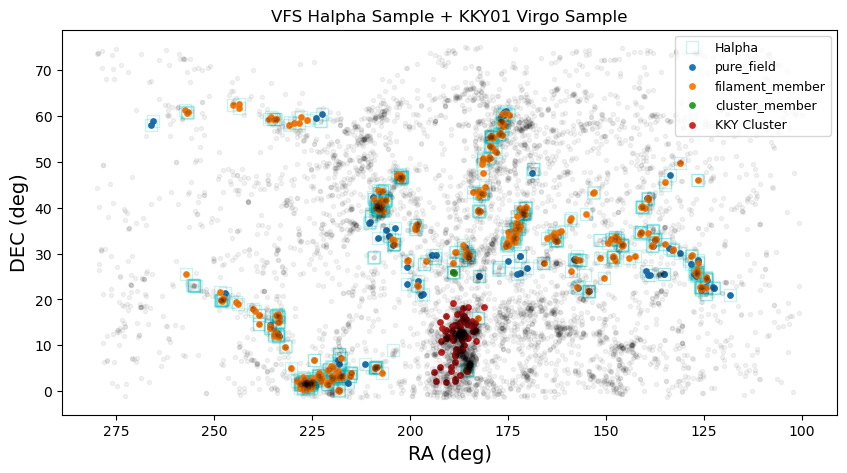

In [118]:
# plot subsamples

plt.figure(figsize=(10,5))

# plot full VFS sample as background
plt.plot(v.main['RA'],v.main['DEC'],'k.',alpha=.05)

# plot full Halpha Sample with cyan boxes
flag = v.main['HAobsflag']
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'cs',mfc='None',markersize=9,alpha=.2, label='Halpha',zorder=0)

envs = ['pure_field','filament_member','cluster_member']
for e in envs:
    print(e)
    flag = v.env[e] & v.main['HAobsflag']
    plt.scatter(v.main['RA'][flag], v.main['DEC'][flag], label=e,s=15)


# READ IN MATCHED CLUSTER SAMPLE 
vcluster = Table.read('vf_v2_koopmann_sample.fits')
flag = vcluster['kmatchflag']
plt.scatter(vcluster['RA'][flag],vcluster['DEC'][flag],label='KKY Cluster',s=15)
plt.gca().invert_xaxis()
plt.legend(loc='upper right',fontsize=9)

plt.xlabel('RA (deg)', fontsize=14)
plt.ylabel('DEC (deg)', fontsize=14)

plt.title("VFS Halpha Sample + KKY01 Virgo Sample")
plt.show()